# effect of health spending on residual life expectancy

In [12]:
from pathlib import Path
from pprint import pprint
import yaml

import numpy as np
import pandas as pd

import matplotlib
matplotlib.rcParams['figure.figsize'] = [18, 6]
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['axes.grid.which'] = 'both'

path_data = Path("../data")
path_results = Path("../analysis_results")

pprint(list(path_data.iterdir()))

[PosixPath('../data/israel_2019_age_pyramid.csv'),
 PosixPath('../data/mortality_per_1000_people_femails_by_age_year.csv'),
 PosixPath('../data/mortality_2017_by_age.csv'),
 PosixPath('../data/manipulated_copy_of_mortality_2017_by_age.ods'),
 PosixPath('../data/mortality_per_1000_people_2017_by_age.csv'),
 PosixPath('../data/health_office_models_runaway_stats.csv'),
 PosixPath('../data/WHO_residual_life_expectancy_by_year_group_age.csv'),
 PosixPath('../data/mortality_per_1000_people_mails_by_age_year.csv'),
 PosixPath('../data/residual_life_expectancy_femails_age_year.csv'),
 PosixPath('../data/WHO_residual_life_expectancy_2016_by_group_age.csv'),
 PosixPath('../data/israel_health_expenditure_each_year.csv'),
 PosixPath('../data/.~lock.health_office_models_runaway_stats.csv#'),
 PosixPath('../data/united_kingdom'),
 PosixPath('../data/israel_health_spending_inflation_adjusted.csv'),
 PosixPath('../data/health_office_models_runaway_distribution_of_death.csv'),
 PosixPath('../data/resid

In [2]:
from pandas_utils import extract_interval_end_from_text, text_interval_index_to_interval_index, reduce_histogram_resolution

## residual life expectancy over time

In [5]:
df_0 = pd.read_csv(path_data.joinpath('WHO_residual_life_expectancy_by_year_group_age.csv'), index_col=0, header=[0, 1], skiprows=[2,], )
df_0.index = text_interval_index_to_interval_index(df_0.index, closed='both')
df_0.index.name = 'age_group'
df_0.columns.names = ['year', 'sex']
df_0.sort_index(axis=1, inplace=True)


dfs = df_0.swaplevel('year', 'sex', axis=1)
df = (dfs['Male'] + dfs['Female']) / 2

residual_life_expectancy = df.swapaxes(0, 1)
residual_life_expectancy.index = pd.to_numeric(residual_life_expectancy.index)

In [6]:
residual_life_expectancy

age_group  [1, 4]  [5, 9]  [10, 14]  [15, 19]  [20, 24]  [25, 29]  [30, 34]  \
year                                                                          
2000        77.70   73.80     68.90     63.90     59.05     54.25     49.40   
2001        78.10   74.20     69.20     64.30     59.45     54.65     49.85   
2002        78.05   74.15     69.25     64.25     59.45     54.65     49.85   
2003        78.50   74.60     69.65     64.70     59.85     55.00     50.15   
2004        79.00   75.10     70.15     65.20     60.30     55.45     50.65   
2005        79.05   75.15     70.15     65.25     60.30     55.45     50.60   
2006        79.60   75.65     70.70     65.75     60.85     56.00     51.15   
2007        79.75   75.75     70.85     65.85     61.00     56.10     51.25   
2008        80.30   76.35     71.40     66.50     61.55     56.70     51.80   
2009        80.85   76.90     71.95     67.00     62.10     57.25     52.35   
2010        81.00   77.05     72.10     67.10     62.25     57.35     52.45   
2011        81.10   77.15     72.20     67.25     62.35     57.40     52.55   
2012        81.10   77.20     72.25     67.30     62.35     57.45     52.50   
2013        81.40   77.50     72.50     67.55     62.65     57.70     52.85   
2014        81.45   77.55     72.55     67.65     62.70     57.85     52.90   
2015        81.25   77.30     72.35     67.40     62.45     57.55     52.65   
2016        81.45   77.55     72.55     67.60     62.70     57.75     52.90   

age_group  [35, 39]  [40, 44]  [45, 49]  [50, 54]  [55, 59]  [60, 64]  \
year                                                                    
2000          44.55     39.80     35.10     30.45     25.95     21.60   
2001          45.00     40.25     35.55     30.90     26.40     22.05   
2002          45.05     40.30     35.60     30.95     26.50     22.10   
2003          45.30     40.55     35.85     31.15     26.65     22.30   
2004          45.80     40.95     36.25     31.60     27.05     22.70   
2005          45.75     40.95     36.20     31.60     27.10     22.70   
2006          46.30     41.45     36.75     32.10     27.55     23.15   
2007          46.40     41.55     36.80     32.15     27.60     23.20   
2008          46.95     42.10     37.35     32.70     28.15     23.70   
2009          47.45     42.60     37.85     33.15     28.65     24.20   
2010          47.60     42.75     38.00     33.30     28.70     24.30   
2011          47.60     42.80     37.95     33.30     28.75     24.35   
2012          47.65     42.80     38.00     33.30     28.70     24.25   
2013          47.95     43.10     38.25     33.55     29.05     24.60   
2014          48.05     43.15     38.40     33.65     29.10     24.70   
2015          47.80     42.90     38.10     33.35     28.85     24.40   
2016          48.00     43.15     38.30     33.65     29.05     24.65   

age_group  [65, 69]  [70, 74]  [75, 79]  [80, 84]  [85, 120]  
year                                                          
2000          17.60     13.85     10.60      7.80       5.55  
2001          18.00     14.30     10.95      8.15       5.85  
2002          18.10     14.25     10.95      8.15       5.90  
2003          18.20     14.45     11.05      8.25       5.90  
2004          18.55     14.80     11.30      8.45       6.00  
2005          18.55     14.75     11.20      8.30       5.85  
2006          18.95     15.10     11.60      8.55       6.10  
2007          18.95     15.10     11.60      8.60       6.05  
2008          19.50     15.55     12.05      8.85       6.30  
2009          19.95     15.90     12.35      9.10       6.55  
2010          20.05     16.05     12.40      9.15       6.55  
2011          20.10     16.00     12.45      9.20       6.60  
2012          20.00     16.00     12.45      9.20       6.65  
2013          20.35     16.35     12.65      9.50       6.90  
2014          20.45     16.35     12.60      9.45       6.85  
2015          20.15     16.15     12.35

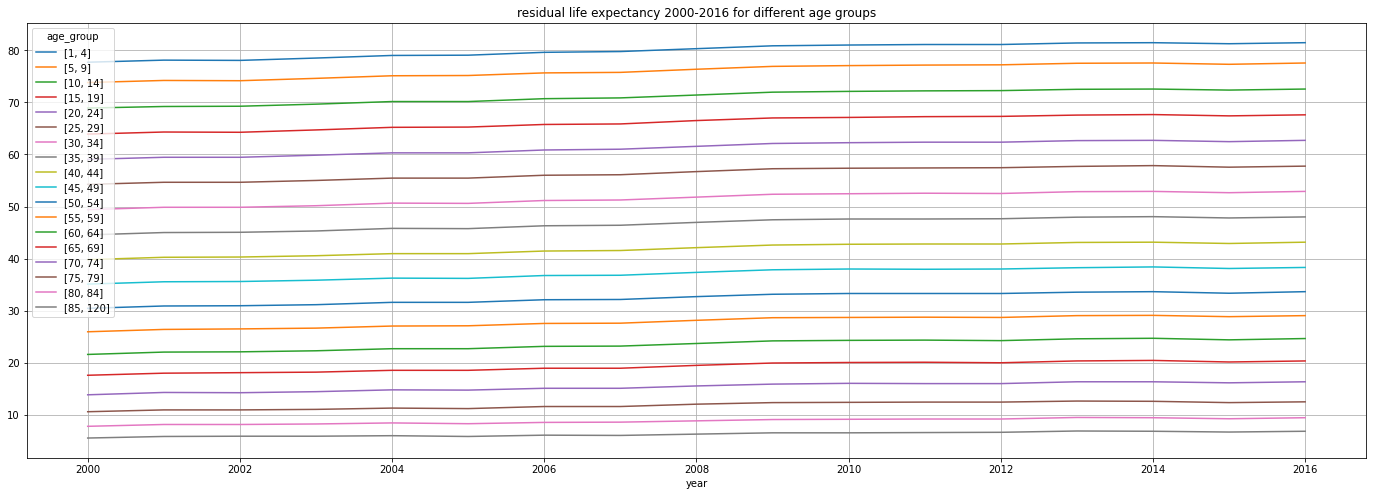

In [7]:
residual_life_expectancy.rename(columns=lambda x:  str(x)).plot(grid=True, figsize=(24, 8), title='residual life expectancy 2000-2016 for different age groups')

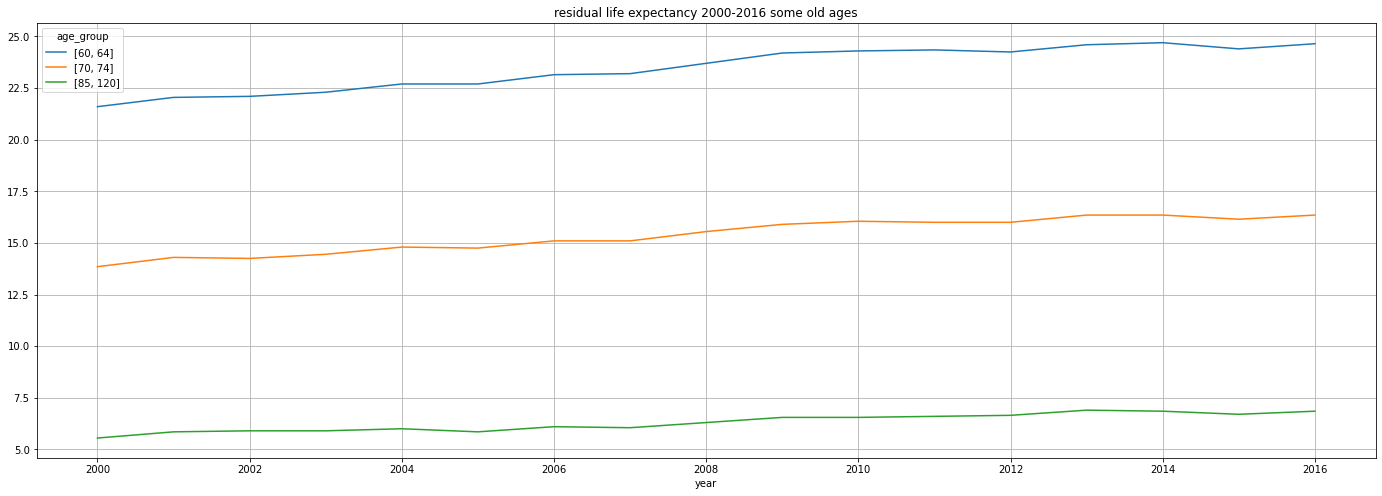

In [8]:
residual_life_expectancy.rename(columns=lambda x : str(x)).loc[:, ['[60, 64]', '[70, 74]', '[85, 120]']].plot(grid=True, title='residual life expectancy 2000-2016 some old ages', figsize=(24, 8))

In [9]:
residual_life_expectancy_diff = residual_life_expectancy.diff(axis=0)

Text(0, 0.5, 'delta[years]')

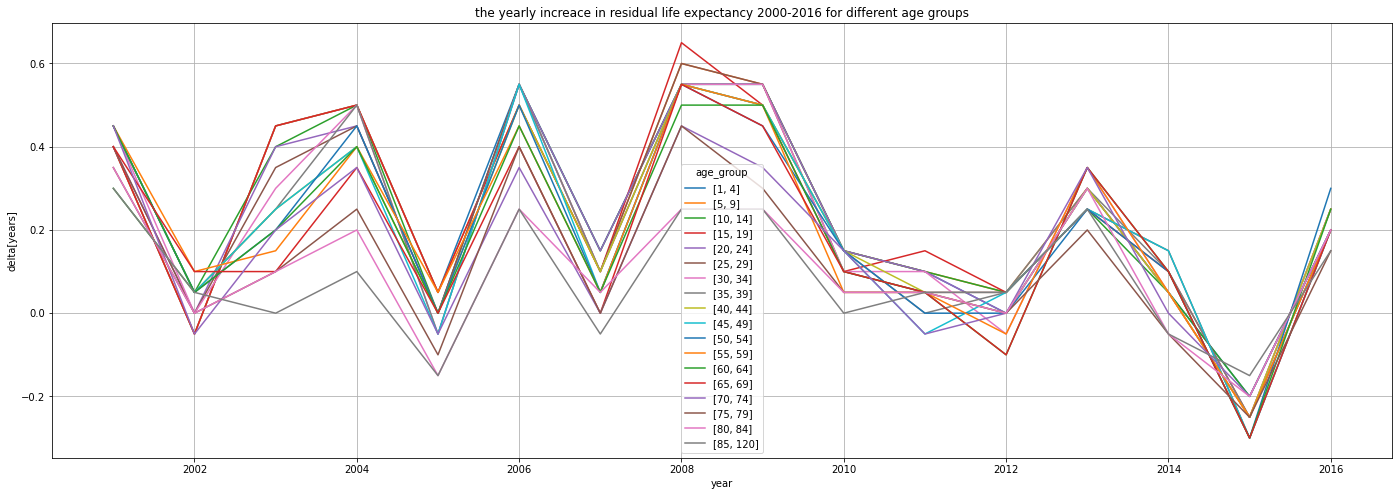

In [10]:
ax = residual_life_expectancy_diff.rename(columns=lambda x:  str(x)).plot(grid=True, figsize=(24, 8), title='the yearly increace in residual life expectancy 2000-2016 for different age groups')
ax.set_ylabel('delta[years]')

### checking consistency of yearly increase

In [11]:
residual_life_expectancy_diff.describe().loc[['mean', 'std'], :]

age_group    [1, 4]    [5, 9]  [10, 14]  [15, 19]  [20, 24]  [25, 29]  \
mean       0.234375  0.234375  0.228125  0.231250  0.228125  0.218750   
std        0.241329  0.246792  0.228012  0.245544  0.240810  0.248244   

age_group  [30, 34]  [35, 39]  [40, 44]  [45, 49]  [50, 54]  [55, 59]  \
mean       0.218750  0.215625  0.209375  0.200000  0.200000  0.193750   
std        0.254214  0.240637  0.228195  0.243584  0.236643  0.229401   

age_group  [60, 64]  [65, 69]  [70, 74]  [75, 79]  [80, 84]  [85, 120]  
mean       0.190625  0.171875  0.156250  0.118750  0.103125   0.081250  
std        0.236092  0.228012  0.208866  0.193972  0.161729   0.147054

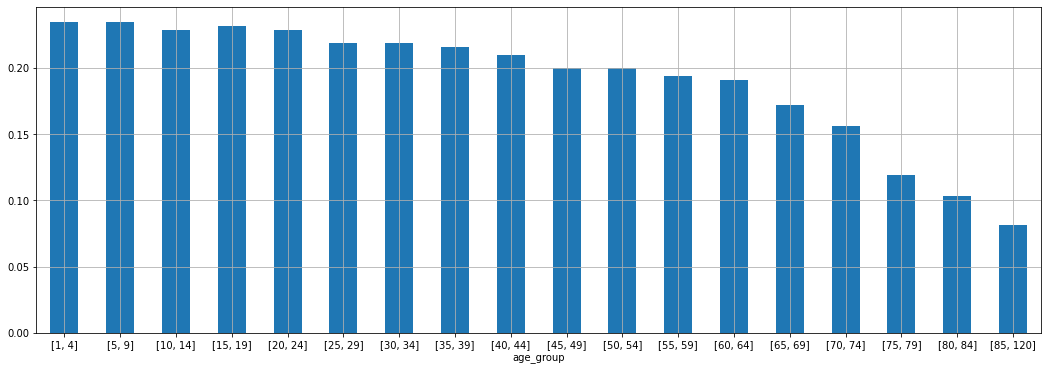

In [13]:
residual_life_expectancy_yearly_increace_by_age = residual_life_expectancy_diff.mean(axis=0)
residual_life_expectancy_yearly_increace_by_age.plot.bar(rot=0)

### conclusion: residual life expectancy increase yearly for all age groups. it's a little noisy, but consistent over the years

## life years lost due to degregation of one year

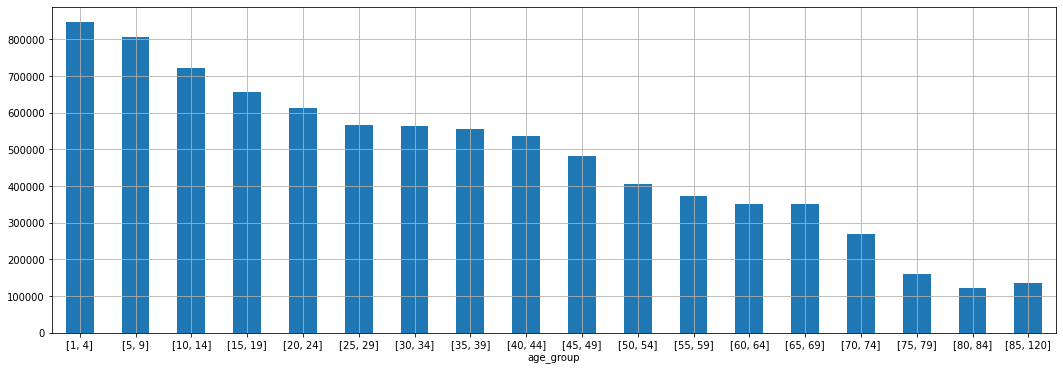

In [14]:
age_pyramid = pd.read_csv(path_data.joinpath('israel_2019_age_pyramid.csv'), index_col=0)
age_pyramid.index = text_interval_index_to_interval_index(age_pyramid.index, closed='both')
age_pyramid = age_pyramid.M + age_pyramid.F
age_pyramid = reduce_histogram_resolution(age_pyramid, residual_life_expectancy_yearly_increace_by_age.index)
age_pyramid.plot.bar(rot=0)

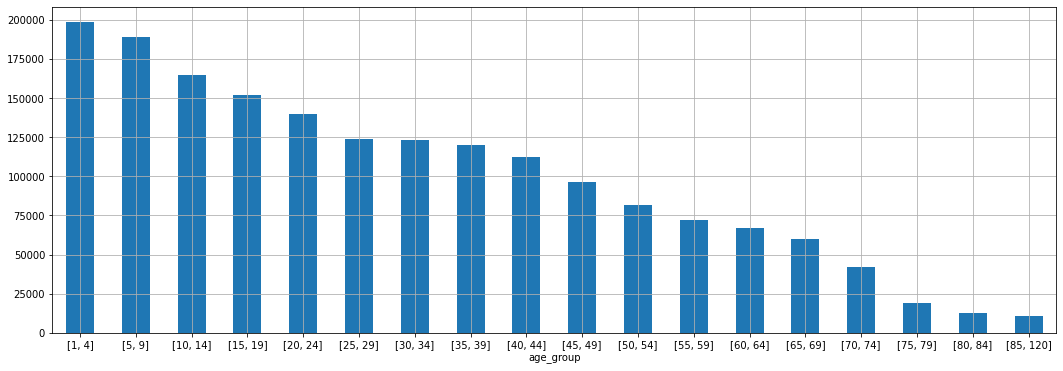

In [17]:
total_remaining_life_years_yearly_increace_by_age = residual_life_expectancy_yearly_increace_by_age * age_pyramid
total_remaining_life_years_yearly_increace_by_age.plot.bar(rot=0)

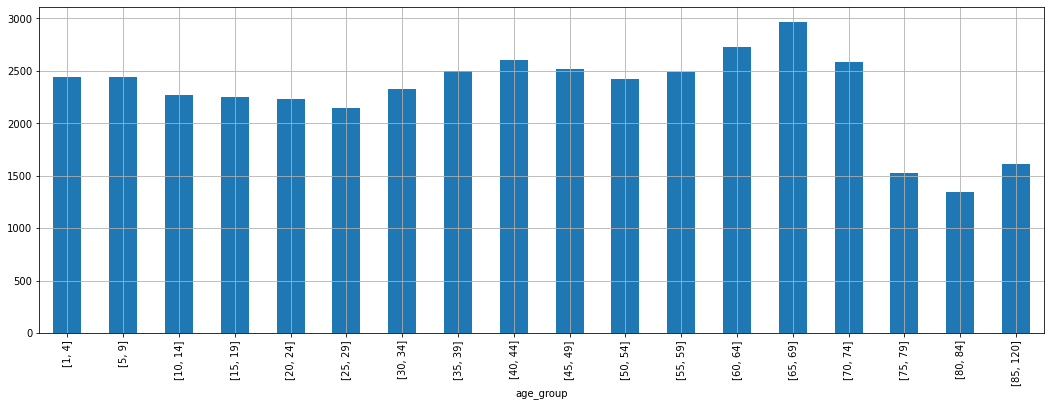

In [18]:
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age = total_remaining_life_years_yearly_increace_by_age / residual_life_expectancy.loc[2016, :]
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.plot.bar()

In [19]:
residual_life_expectancy_yearly_increace_by_age.to_csv(path_results.joinpath('residual_life_expectancy_yearly_increace_by_age.csv'))
total_remaining_life_years_yearly_increace_by_age.to_csv(path_results.joinpath('total_remaining_life_years_yearly_increace_by_age.csv'))
total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.to_csv(path_results.joinpath('total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age.csv'))

In [20]:
#some pandas didn't work here nicely, dumped this cell \n
#yearly_increase_by_age_group = pd.concat(
#    [residual_life_expectancy_yearly_increace_by_age, total_remaining_life_years_yearly_increace_by_age, total_remaining_life_years_life_saving_equivalent_yearly_increace_by_age],
#    axis=1
#)
#yearly_increase_by_age_group.columns = ['residual_life_expectancy', 'total_remaining_life_years_2016', 'total_remaining_life_years_life_equivalent_2016']
#yearly_increase_by_age_group.to_csv(path_results.joinpath('yearly_increase_by_age_group.csv'))
#yearly_increase_by_age_group

## health spending in israel over time

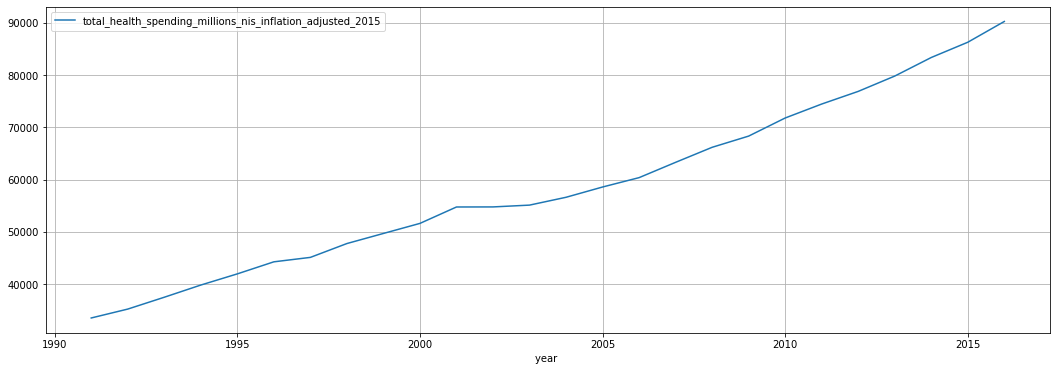

In [21]:
df_health_expenditure = pd.read_csv(path_data.joinpath('israel_health_spending_inflation_adjusted.csv'), index_col=0)
df_health_expenditure.plot()

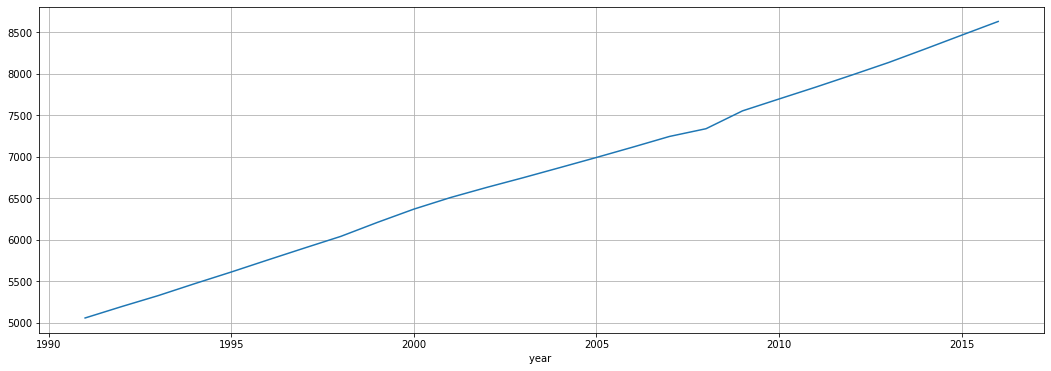

In [22]:
population = pd.read_csv(path_data.joinpath('israel_demographic_table_wikipedia.csv'), index_col=0, usecols=[0,1,], squeeze=True)
population = population.loc[df_health_expenditure.index]
population.plot()

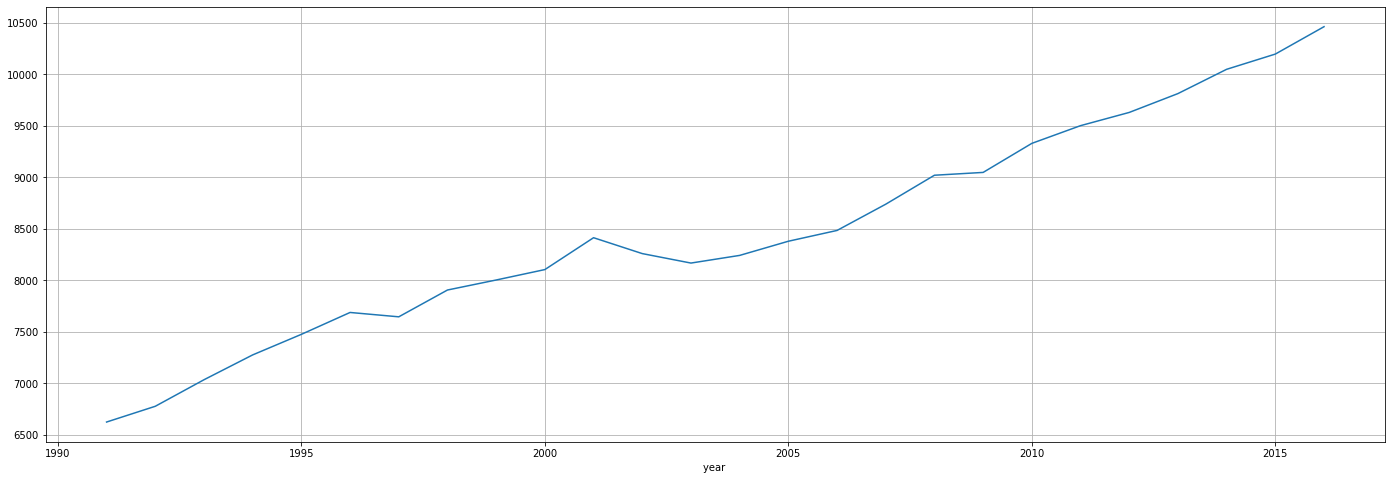

In [23]:
df_health_expenditure['nis_per_capita'] = df_health_expenditure.total_health_spending_millions_nis_inflation_adjusted_2015 / (population / 1000)
#df_health_expenditure.dropna()
df_health_expenditure.nis_per_capita.plot(grid=True, figsize=(24, 8))


### difference between health expenditures per capita between adjecent years

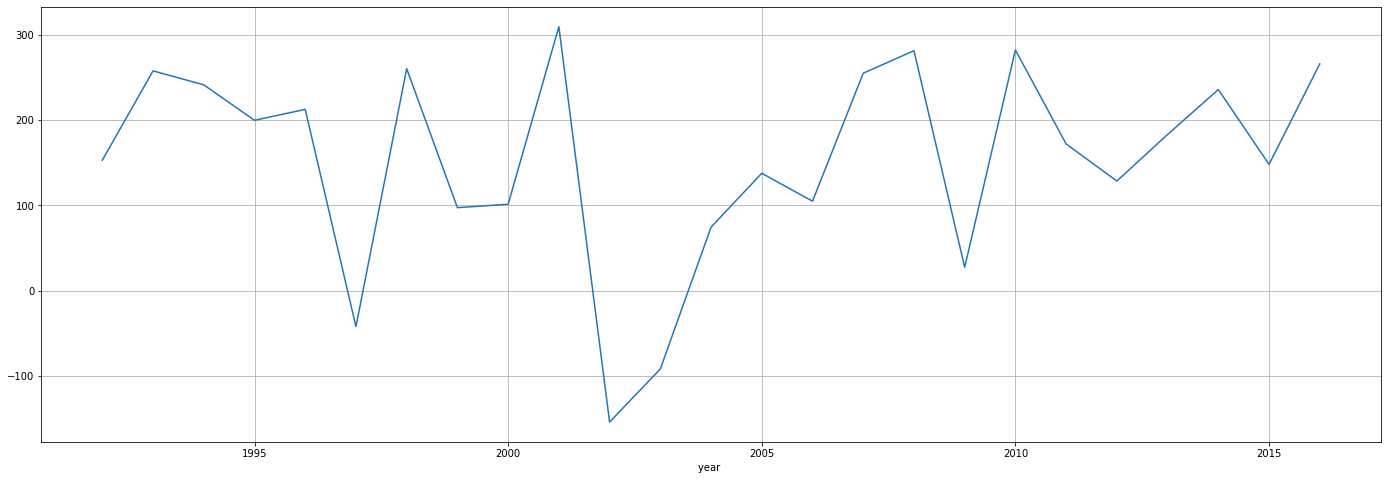

In [24]:
df_health_expenditure.nis_per_capita.diff().plot(grid=True, figsize=(24, 8))
health_spending_per_capita_yearly_increase = df_health_expenditure.nis_per_capita.diff().median()


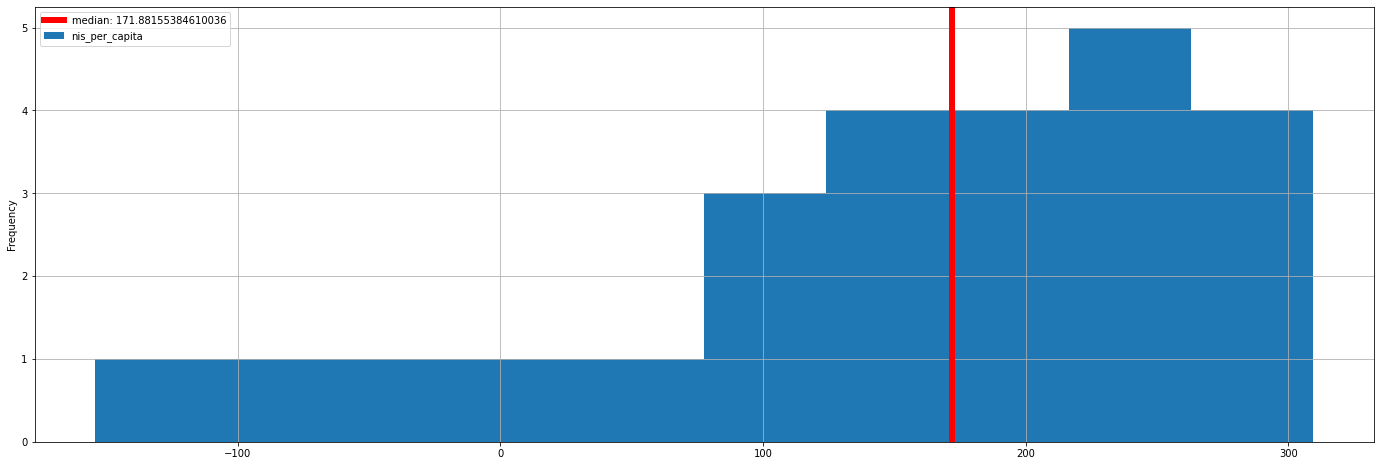

In [25]:
ax = df_health_expenditure.nis_per_capita.diff().plot.hist(grid=True, figsize=(24, 8))
ax.axvline(health_spending_per_capita_yearly_increase, color='red', label=f'median: {health_spending_per_capita_yearly_increase}', linewidth=6)
ax.legend(loc='best')

### conclusion: 

In [26]:
print(f"every year the israeli health spending per capita increases ~{health_spending_per_capita_yearly_increase} NIS")

every year the israeli health spending per capita increases ~171.88155384610036 NIS


In [27]:
dict_file = {'health_spending_per_capita_yearly_increase' : float(health_spending_per_capita_yearly_increase)}
with open(path_results.joinpath('health_spending_per_capita_yearly_increase.yaml'), 'w') as file:
    documents = yaml.dump(dict_file, file)